# Airline sentiment on Twitter

## Abstract:
February 17-24, 2015 Twitter data was scraped and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as “late flight” or “rude service”). The dataset was discovered on [kaggle.com](https://www.kaggle.com/crowdflower/twitter-airline-sentiment) with the original data coming from [figure-eight Data For Everyone](https://www.figure-eight.com/data-for-everyone/). 

With this dataset, I explore which Airline receives the most negative sentiments. I creating visualizations that show the total sentiments per Airline, each category of negative sentiment by Airline, and then dive deeper into American Airline's problems. 

### Ensure the latest version of seaborn is loaded into notebook

In [0]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 215kB 26.3MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


### Imports

In [0]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

### Uploading CSV file, adding headers

In [0]:
# Import the csv file into a dataframe for analysis and manipulation

df = pd.read_csv('https://raw.githubusercontent.com/Vonganization/CSV_datasets/master/Tweets.csv',
                 sep=','
                )
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Understanding the data
- Checking to see if null values will affect our goal

 - I can see that we do have null values in some fields, but it will not effect the reports we will be generating

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


### Aggregating the data to get a high-level understanding of what we're looking at
We will build a visualization with the aggregated date

In [0]:
df_gb = df[['airline_sentiment','airline']].groupby(['airline','airline_sentiment']).size().reset_index()
df_gb.columns = ['airline', 'airline_sentiment', 'sentiment_count']
print(df_gb)

           airline airline_sentiment  sentiment_count
0         American          negative             1960
1         American           neutral              463
2         American          positive              336
3            Delta          negative              955
4            Delta           neutral              723
5            Delta          positive              544
6        Southwest          negative             1186
7        Southwest           neutral              664
8        Southwest          positive              570
9       US Airways          negative             2263
10      US Airways           neutral              381
11      US Airways          positive              269
12          United          negative             2633
13          United           neutral              697
14          United          positive              492
15  Virgin America          negative              181
16  Virgin America           neutral              171
17  Virgin America          

### Creating a visualization for the dataframe above

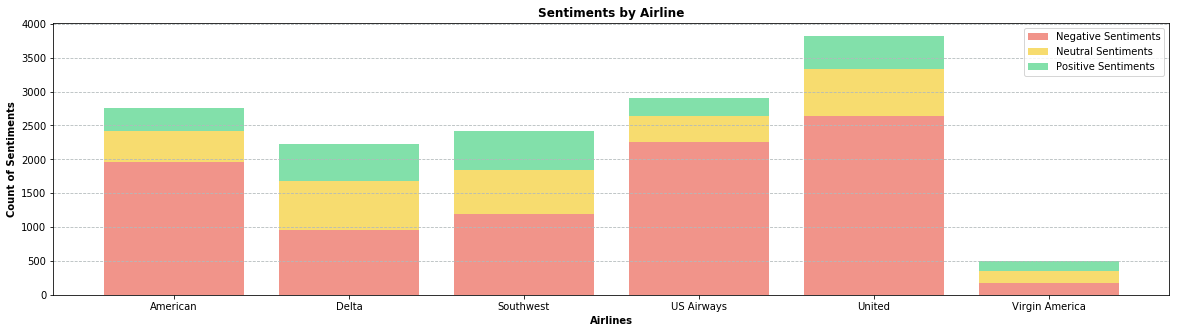

In [0]:
x = df_gb['airline'].unique()
y_negative = df_gb[df_gb.airline_sentiment=='negative'].sentiment_count.reset_index(drop='True')
y_neutral = df_gb[df_gb.airline_sentiment=='neutral'].sentiment_count.reset_index(drop='True')
y_positive = df_gb[df_gb.airline_sentiment=='positive'].sentiment_count.reset_index(drop='True')

bar_top = y_negative + y_neutral

plt.figure(figsize=(20,5))
plt.grid(b=True, which='both', axis='y', linestyle='dashed', color='#B2BABB')
plt.bar(x, y_negative, color='#F1948A', label='Negative Sentiments')
plt.bar(x, y_neutral, bottom=y_negative, color='#F7DC6F', label='Neutral Sentiments')
plt.bar(x, y_positive, bottom=bar_top, color='#82E0AA', label='Positive Sentiments')
plt.ylabel('Count of Sentiments', fontweight='bold')
plt.xlabel('Airlines', fontweight='bold')
plt.title('Sentiments by Airline', fontweight='bold')
plt.legend(loc='upper right')

### Focusing only on the negative reasons for tweets



In [0]:
df_ng = df[df.airline_sentiment=='negative'][['airline','negativereason']].groupby(['airline','negativereason']).size().reset_index()
df_ng.columns = ['airline', 'negativereason', 'reason_count']
df_ng.head(11)

,airline,negativereason,reason_count
0,American,Bad Flight,87
1,American,Can't Tell,198
2,American,Cancelled Flight,246
3,American,Customer Service Issue,768
4,American,Damaged Luggage,12
5,American,Flight Attendant Complaints,87
6,American,Flight Booking Problems,130
7,American,Late Flight,249
8,American,Lost Luggage,149
9,American,longlines,34


### Visualization: showing how each Airline performs per Negative Reason type

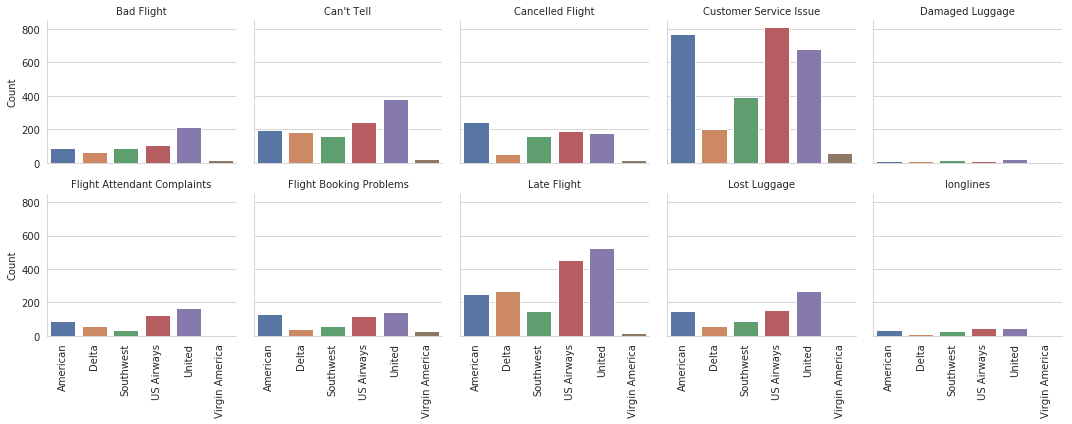

In [0]:
# Adds grid-lines to 
sns.set_style('whitegrid')

g_ng = sns.catplot(x='airline', y='reason_count', col='negativereason', data=df_ng, kind='bar', palette='deep', height=3, aspect=1, col_wrap=5)
g_ng.set_axis_labels('', 'Count').set_titles('{col_name}').set_xticklabels(rotation=90);
plt.tight_layout()
plt.show()

### Before we begin to draw conclusion, we should look at the Tweets over time

### We begin by creating a dataframe for only negative Tweets

In [0]:
# Creating a dataframe of only negative Tweets
df_ng_time = df[df.airline_sentiment=='negative'][['airline', 'tweet_created']]

# Converting the 'Tweet Created' column into an actual datetime type
# dt.date used to extract only the date part of datetime
df_ng_time['datestamp']= pd.to_datetime(df_ng_time['tweet_created'], infer_datetime_format=True, errors='coerce').dt.date

# Cleaning up the dataframe: turning the series back into a dataframe and updating the headers
df_ng_time_agg = df_ng_time[['airline', 'datestamp']].groupby(['datestamp', 'airline']).size().reset_index()
df_ng_time_agg.columns = ['datestamp', 'airline', 'n_count']

# Display only the first 10 values in the dataframe
df_ng_time_agg.head(10)

,datestamp,airline,n_count
0,2015-02-17,Delta,51
1,2015-02-17,Southwest,162
2,2015-02-17,US Airways,156
3,2015-02-17,United,173
4,2015-02-17,Virgin America,10
5,2015-02-18,Delta,127
6,2015-02-18,Southwest,143
7,2015-02-18,US Airways,259
8,2015-02-18,United,281
9,2015-02-18,Virgin America,17


### Now we create the Visualization for the dataframe

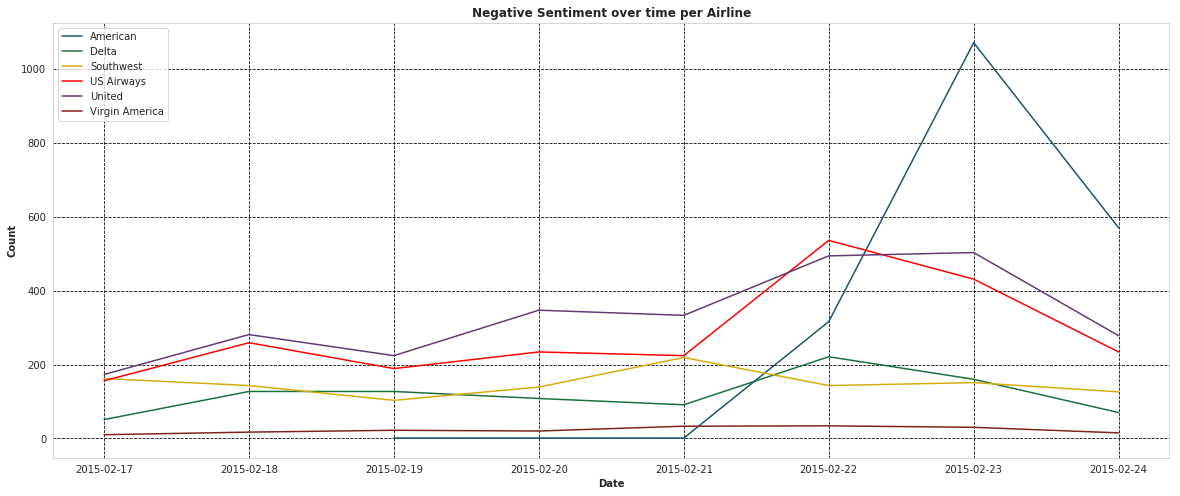

In [0]:
plt.figure(figsize=(20,8))
plt.plot(df_ng_time_agg[df_ng_time_agg.airline=='American'].datestamp, df_ng_time_agg[df_ng_time_agg.airline=='American'].n_count, color='#1A5276', label='American');
plt.plot(df_ng_time_agg[df_ng_time_agg.airline=='Delta'].datestamp, df_ng_time_agg[df_ng_time_agg.airline=='Delta'].n_count, color='#196F3D', label='Delta')
plt.plot(df_ng_time_agg[df_ng_time_agg.airline=='Southwest'].datestamp, df_ng_time_agg[df_ng_time_agg.airline=='Southwest'].n_count, color='#D4AC0D', label='Southwest')
plt.plot(df_ng_time_agg[df_ng_time_agg.airline=='US Airways'].datestamp, df_ng_time_agg[df_ng_time_agg.airline=='US Airways'].n_count, color='red', label='US Airways')
plt.plot(df_ng_time_agg[df_ng_time_agg.airline=='United'].datestamp, df_ng_time_agg[df_ng_time_agg.airline=='United'].n_count, color='#633974', label='United')
plt.plot(df_ng_time_agg[df_ng_time_agg.airline=='Virgin America'].datestamp, df_ng_time_agg[df_ng_time_agg.airline=='Virgin America'].n_count, color='#7B241C', label='Virgin America')
plt.title('Negative Sentiment over time per Airline', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.grid(b=True, which='both', linestyle='dashed', color='black')
plt.legend(loc='upper left')
plt.show;


### I see an abnormality, that American doesn't have any Tweets until 2015-02-19.

### I begin to investigate further:
- I'll look at the aggregated data to see if there is data not being represented

In [0]:
df_ng_time_agg[df_ng_time_agg.airline=='American']

,datestamp,airline,n_count
10,2015-02-19,American,1
16,2015-02-20,American,1
22,2015-02-21,American,1
28,2015-02-22,American,316
34,2015-02-23,American,1071
40,2015-02-24,American,570


### I'll verify the data by doing a search for all rows between those dates, for American airlines

In [0]:
start_date = datetime.date(2015, 2, 17)
end_date = datetime.date(2015,2,21)
mask = (df_ng_time['datestamp'] > start_date) & (df_ng_time['datestamp'] <= end_date)
df5 = df_ng_time.loc[mask]
df5[df5.airline=='American']

,airline,tweet_created,datestamp
12034,American,2015-02-21 00:14:16 -0800,2015-02-21
12035,American,2015-02-20 09:28:32 -0800,2015-02-20
12037,American,2015-02-18 20:25:30 -0800,2015-02-19


### I see that indeed there are only three rows of data for those dates, and that the plot is correct

### Investigating the count of negative reasons for American Airline on 2015-02-23

In [0]:
df_nr = df[df.airline_sentiment=='negative'][['airline', 'negativereason','tweet_created']]
df_nr['datestamp']= pd.to_datetime(df_nr['tweet_created'], infer_datetime_format=True, errors='coerce').dt.date
df_nr_count = df_nr[(df_nr.airline=='American') & (df_nr.datestamp==datetime.date(2015, 2, 23))][['negativereason']].reset_index(drop=True)
df_nr_count.groupby(df_nr_count['negativereason']).size().unstack

<bound method Series.unstack of negativereason
Bad Flight                      34
Can't Tell                      97
Cancelled Flight               138
Customer Service Issue         459
Damaged Luggage                  7
Flight Attendant Complaints     36
Flight Booking Problems         66
Late Flight                    129
Lost Luggage                    83
longlines                       22
dtype: int64>

### Some thoughts

#### American's spike
- After seeing the large spike, I performed an American Airline 2015-02-23 Google search and saw that one of their jets slid off an icy taxiway.
- I also read the tweets to see what the pattern was for the negative reason being Customer Service Issue and see that much of it has to do with being on hold. Although some of these tweets can be reclassified as "Cancelled Flight," or Flight Booking Problems," it all begins with being connected.

#### Recommendations to resolve these issues:
From these visualizations, we can see that a majority of the negative sentiment stem from Customer Service Issues.
- Hold time appears to be a common issue
 - American Airlines could develop a website or an App feature where people whose flights have been canceled due to some emergency (weather, accident, etc.).
 - A/B testing could be performed on flights that were canceled
 - A SMS message with instructions could be sent to those who are asked to be part of a test group (perhaps the people call in, and are offered a chance to take the alternate option?)
 - Tweets do have locations recorded, and so we can monitor the location where an emergency occurs
 - We would define a successful outcome as one that shows that the two distributions are significantly different with a p-value lower than 0.01 (dependent on the field)